In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error

In [6]:
salary = pd.read_csv('../datasets/salary_prediction/Salary Data.csv').dropna(how='all')
salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [7]:
salary.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 78.2 KB


In [8]:
salary["Job Title"].apply(lambda x: x.split()[0]).value_counts()

Job Title
Senior            152
Junior             90
Director           36
Sales               9
Marketing           7
Customer            6
Product             4
HR                  4
Data                4
Software            4
Business            4
Operations          4
Project             3
Financial           3
IT                  3
Technical           3
Recruiter           2
VP                  2
Social              2
UX                  2
Administrative      2
Chief               2
Principal           2
Research            2
Digital             2
Event               2
Supply              2
Copywriter          1
Network             1
CEO                 1
Accountant          1
Strategy            1
Graphic             1
Account             1
Creative            1
Web                 1
Help                1
Content             1
Human               1
Training            1
Public              1
Office              1
Name: count, dtype: int64

In [9]:
salary["Job Title"].apply(lambda x: x.split()[-1]).value_counts()

Job Title
Manager           96
Analyst           69
Coordinator       28
Specialist        20
Engineer          17
Scientist         16
Designer          15
Marketing         13
Operations        12
Associate          9
Developer          9
Representative     8
Director           7
Accountant         6
Generalist         5
Advisor            5
Consultant         4
Recruiter          4
Finance            3
Assistant          2
Rep                2
Executive          2
Engineering        2
Copywriter         2
Officer            2
Resources          2
Researcher         2
CEO                1
Clerk              1
Support            1
Writer             1
Producer           1
Management         1
Sales              1
Development        1
Capital            1
Architect          1
HR                 1
Name: count, dtype: int64

In [10]:
salary["Job Title"].value_counts()

Job Title
Director of Marketing             12
Director of Operations            11
Senior Business Analyst           10
Senior Marketing Manager           9
Senior Marketing Analyst           9
                                  ..
Junior Social Media Specialist     1
Junior Operations Coordinator      1
Senior HR Specialist               1
Director of HR                     1
Junior Financial Advisor           1
Name: count, Length: 174, dtype: int64

In [11]:
salary["Education Level"].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [12]:
y = salary["Salary"]
x = salary.drop("Salary", axis=1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((279, 5), (94, 5), (279,), (94,))

In [15]:
# def preprocess(data):
#     data = data.copy()
#     data_info = {}
    
#     data["Age"] = data["Age"].astype("int8")
#     data["Gender"] = (data["Gender"] == "Male").astype("int8")
#     data["Years of Experience"] = data["Years of Experience"].astype("int8")
#     edu_map = {"Bachelor's": 0, "Master's": 1, "PhD": 2}
#     data_info["edu_map"] = edu_map
#     data["Education Level"] = data["Education Level"].map(edu_map).astype("int8")

#     def extract_seniority(title):
#         title = str(title).lower()
#         if re.search(r'chief|ceo|director|vp|principal|lead', title):
#             return 4
#         elif 'senior' in title:
#             return 3
#         elif 'middle' in title or 'mid' in title:
#             return 2
#         elif 'junior' in title:
#             return 1
#         else:
#             return 0

#     def extract_specialization(title):
#         title = str(title)
#         ignore = set(['junior','middle','mid','senior','chief','director','vp','principal','lead','ceo'])
#         parts = title.split()
#         filtered = [w for w in parts if w.lower() not in ignore]
#         return " ".join(filtered) if filtered else title

#     data["Seniority"] = data["Job Title"].apply(extract_seniority).astype('int8')
#     data["Specialization"] = data["Job Title"].apply(extract_specialization)
#     data.drop("Job Title", axis=1, inplace=True)

#     # # 1 method
#     spec_counts = data["Specialization"].value_counts()
#     popular_specs = spec_counts[spec_counts > 7].index
    
#     # # 2 method
#     # spec_counts = data['Specialization'].value_counts()
#     # total = len(data)
#     # min_percent = 0.02
#     # popular_specs = spec_counts[spec_counts / total >= min_percent].index

#     # # 3 method
#     # spec_counts = data['Specialization'].value_counts()
#     # cum_share = (spec_counts / spec_counts.sum()).cumsum()
#     # popular_specs = cum_share[cum_share <= 0.9].index

#     # # 4 method
#     # min_percent=0.02
#     # top_coverage=0.9
#     # max_dummies=10

#     # spec_counts = data['Specialization'].value_counts()
#     # total = len(data)

#     # specs_by_percent = spec_counts[spec_counts / total >= min_percent].index

#     # cum_share = (spec_counts / spec_counts.sum()).cumsum()
#     # specs_by_cover = cum_share[cum_share <= top_coverage].index

#     # specs_by_top = spec_counts[:max_dummies].index

#     # # popular_specs = set(specs_by_percent) | set(specs_by_cover) | set(specs_by_top)
#     # popular_specs = set(specs_by_percent) & set(specs_by_cover) & set(specs_by_top)
    
#     data_info["popular_specs"] = popular_specs
#     data["Specialization"] = data["Specialization"].apply(lambda x: x if x in popular_specs else 'Other')
#     data = pd.get_dummies(data, columns=["Specialization"], dtype='int8')
#     data_info["data_columns"] = list(data.columns)
    
#     return data, data_info

In [16]:
def preprocess(data):
    data = data.copy()
    data_info = {}

    specialization_map = {
        "software": "IT",
        "developer": "IT",
        "engineer": "IT",
        "data": "Data Science",
        "scientist": "Data Science",
        "analyst": "Analytics",
        "manager": "Management",
        "director": "Executive",
        "marketing": "Marketing",
        "sales": "Sales",
        "project": "Project Management",
        "product": "Product",
        "hr": "HR",
        "financial": "Finance",
        "accountant": "Finance",
        "consultant": "Consulting",
        "designer": "Design",
        "ux": "Design",
        "research": "Research",
        "operations": "Operations"
    }
    data_info["specialization_map"] = specialization_map

    data["Age"] = data["Age"].astype("int8")
    data["Gender"] = (data["Gender"] == "Male").astype("int8")
    data["Years of Experience"] = data["Years of Experience"].astype("int8")
    edu_map = {"Bachelor's": 0, "Master's": 1, "PhD": 2}
    data_info["edu_map"] = edu_map
    data["Education Level"] = data["Education Level"].map(edu_map).astype("int8")

    def extract_seniority(title):
        title = str(title).lower()
        if re.search(r'chief|ceo|director|vp|principal|lead', title):
            return 4
        elif 'senior' in title:
            return 3
        elif 'middle' in title or 'mid' in title:
            return 2
        elif 'junior' in title:
            return 1
        else:
            return 0

    def map_specialization(title):
        title = str(title).lower()
        for key, value in specialization_map.items():
            if key in title:
                return value
        return "Other"

    data["Seniority"] = data["Job Title"].apply(extract_seniority).astype('int8')
    data["Specialization"] = data["Job Title"].apply(map_specialization)
    data.drop("Job Title", axis=1, inplace=True)
    data = pd.get_dummies(data, columns=["Specialization"], dtype='int8')
    data_info["data_columns"] = list(data.columns)

    return data, data_info

In [17]:
x_train_p, data_info = preprocess(x_train)

In [18]:
x_train_p

,Age,Gender,Education Level,Years of Experience,Seniority,Specialization_Analytics,Specialization_Consulting,Specialization_Data Science,Specialization_Design,Specialization_Executive,...,Specialization_HR,Specialization_IT,Specialization_Management,Specialization_Marketing,Specialization_Operations,Specialization_Other,Specialization_Product,Specialization_Project Management,Specialization_Research,Specialization_Sales
209,30,0,0,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
249,47,1,1,20,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
22,30,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
215,34,0,1,6,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
306,49,0,1,21,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,36,1,0,9,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
193,34,1,0,7,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
117,48,1,2,20,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
47,45,0,1,16,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train_spec_cols = [col for col in x_train_p.columns if col.startswith('Specialization_')]
train_spec_counts_final = x_train_p[train_spec_cols].sum().sort_values(ascending=False)
train_spec_counts_final

Specialization_Management            75
Specialization_Analytics             44
Specialization_Executive             31
Specialization_Other                 27
Specialization_IT                    23
Specialization_Data Science          15
Specialization_Marketing             13
Specialization_Finance               10
Specialization_Sales                  9
Specialization_Design                 8
Specialization_HR                     6
Specialization_Product                5
Specialization_Consulting             4
Specialization_Operations             4
Specialization_Project Management     4
Specialization_Research               1
dtype: int64

In [21]:
def preprocess_test(data, data_info):
    data = data.copy()
    specialization_map = data_info["specialization_map"]
    edu_map = data_info["edu_map"]
    data_columns = data_info["data_columns"]

    data["Age"] = data["Age"].astype("int8")
    data["Gender"] = (data["Gender"] == "Male").astype("int8")
    data["Years of Experience"] = data["Years of Experience"].astype("int8")
    data["Education Level"] = data["Education Level"].map(edu_map).astype("int8")

    def extract_seniority(title):
        title = str(title).lower()
        if re.search(r'chief|ceo|director|vp|principal|lead', title):
            return 4
        elif 'senior' in title:
            return 3
        elif 'middle' in title or 'mid' in title:
            return 2
        elif 'junior' in title:
            return 1
        else:
            return 0

    def map_specialization(title):
        title = str(title).lower()
        for key, value in specialization_map.items():
            if key in title:
                return value
        return "Other"

    data["Seniority"] = data["Job Title"].apply(extract_seniority).astype('int8')
    data["Specialization"] = data["Job Title"].apply(map_specialization)
    data.drop("Job Title", axis=1, inplace=True)
    data = pd.get_dummies(data, columns=["Specialization"], dtype='int8')
    data = data.reindex(columns=data_columns, fill_value=0)
    
    return data

In [22]:
x_test_p = preprocess_test(x_test, data_info)

In [23]:
x_test_p

,Age,Gender,Education Level,Years of Experience,Seniority,Specialization_Analytics,Specialization_Consulting,Specialization_Data Science,Specialization_Design,Specialization_Executive,...,Specialization_HR,Specialization_IT,Specialization_Management,Specialization_Marketing,Specialization_Operations,Specialization_Other,Specialization_Product,Specialization_Project Management,Specialization_Research,Specialization_Sales
45,28,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
274,30,1,0,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,29,0,0,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
237,45,1,1,16,3,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
254,35,0,0,8,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,31,1,0,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174,26,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
168,31,0,0,4,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
263,31,0,0,3,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
test_spec_cols = [col for col in x_test_p.columns if col.startswith('Specialization_')]
test_spec_counts_final = x_test_p[test_spec_cols].sum().sort_values(ascending=False)
test_spec_counts_final

Specialization_Analytics             19
Specialization_Management            19
Specialization_Other                 11
Specialization_Data Science           9
Specialization_Executive              9
Specialization_Marketing              9
Specialization_IT                     8
Specialization_HR                     2
Specialization_Design                 2
Specialization_Operations             2
Specialization_Product                1
Specialization_Finance                1
Specialization_Sales                  1
Specialization_Project Management     1
Specialization_Consulting             0
Specialization_Research               0
dtype: int64

In [26]:
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)
pipeline.fit(x_train_p, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('polynomialfeatures', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'


In [59]:
def regression_report(y_true, y_pred):
    print(f"Min y:         {y_true.min():.2f}")
    print(f"Max y:         {y_true.max():.2f}")
    print(f"Mean y:        {y_true.mean():.2f}")
    print(f"Std deviation: {y_true.std():.2f}")
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    print()
    print(f"Mean Squared Error (MSE):       {mse:.3f}")
    print(f"Mean Absolute Error (MAE):      {mae:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R^2 Score:                      {r2:.3f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

In [33]:
def regression_plots(y_true, y_pred):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot(
        [y_true.min(), y_true.max()],
        [y_true.min(), y_true.max()],
        'r--', lw=2, label='Ideal'
    )
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    plt.title('Predictions vs Actual Values')
    plt.legend()

    plt.subplot(1, 2, 2)
    errors = y_true - y_pred
    plt.hist(errors, bins=30, edgecolor='black')
    plt.xlabel('Error (Actual - Prediction)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Errors')
    plt.tight_layout()
    plt.show()

In [34]:
y_predicted_train = pipeline.predict(x_train_p)
np.round(y_predicted_train, decimals=1)

array([ 44646.8, 173012.8,  44310.6,  93419.3, 173630.7, 114035.5,
       124791.9, 150000. , 121265.1, 178778.2,  77028.3, 101756. ,
       101820.4, 124791.9, 144688.7,  99351.3, 123052.3, 112275.6,
       152231.2,  89247.7, 181007.5, 101917.5,  25478.5,  98639.5,
        63884.5, 150000. , 180639.2, 183435.4,  32149. ,  79548.8,
       162221.8,  45691.4,  85720.9, 168637.5,  47121.9, 155136.2,
       106565.7,  95000. ,  40000. , 101376.3, 161301. , 166984.2,
        68966.1, 173872.1, 165973. ,  29731.4,  43407.5,  94742. ,
       115526.6, 130589.4,  54393.2,  50272.6,  37317.9, 141497.1,
       117254.2,  64154.6,  40000. ,  37310.6, 173872.1,  45751.1,
        49409. , 154249.6, 110000. ,  55676.4,  90000. ,  58208.7,
        89725.3,  94218.8,  62479.7,  41709.8,  38035.9,  92742.5,
        50532.7,  32478.2,  55740.1,  65569.9, 173630.7,  58208.7,
        93419.3,  38035.9,  47717.3, 146687.3, 161301. ,  58536.3,
       109327.3, 130000. , 166330.2, 100745.4, 163501.7,  8902

In [35]:
np.array(y_train)

array([ 40000., 170000.,  50000., 100000., 180000., 110000., 110000.,
       150000., 120000., 170000.,  65000.,  95000., 110000., 120000.,
       150000., 100000., 115000., 120000., 140000.,  90000., 185000.,
       110000.,  35000., 100000.,  50000., 150000., 180000., 180000.,
        35000.,  65000., 160000.,  50000., 100000., 170000.,  45000.,
       145000., 100000.,  95000.,  40000.,  90000., 160000., 160000.,
        65000., 180000., 170000.,  40000.,  35000.,  95000., 105000.,
       130000.,  65000.,  50000.,  45000., 140000., 100000.,  75000.,
        40000.,  45000., 180000.,  40000.,  50000., 160000., 110000.,
        50000.,  90000.,  60000.,  85000.,  95000.,  55000.,  40000.,
        40000.,  85000.,  50000.,  35000.,  55000.,  60000., 180000.,
        60000., 100000.,    350.,  45000., 160000., 160000.,  70000.,
       120000., 130000., 160000., 105000., 170000.,  95000., 110000.,
        60000., 130000., 140000.,  35000.,  40000.,  55000., 170000.,
       130000.,  700

In [60]:
regression_report(y_train, y_predicted_train)

Min y:         350.00
Max y:         250000.00
Mean y:        103943.91
Std deviation: 48383.60

Mean Squared Error (MSE):       70298107.972
Mean Absolute Error (MAE):      6065.331
Root Mean Squared Error (RMSE): 8384.397
R^2 Score:                      0.970
Mean Absolute Percentage Error (MAPE): 45.43%


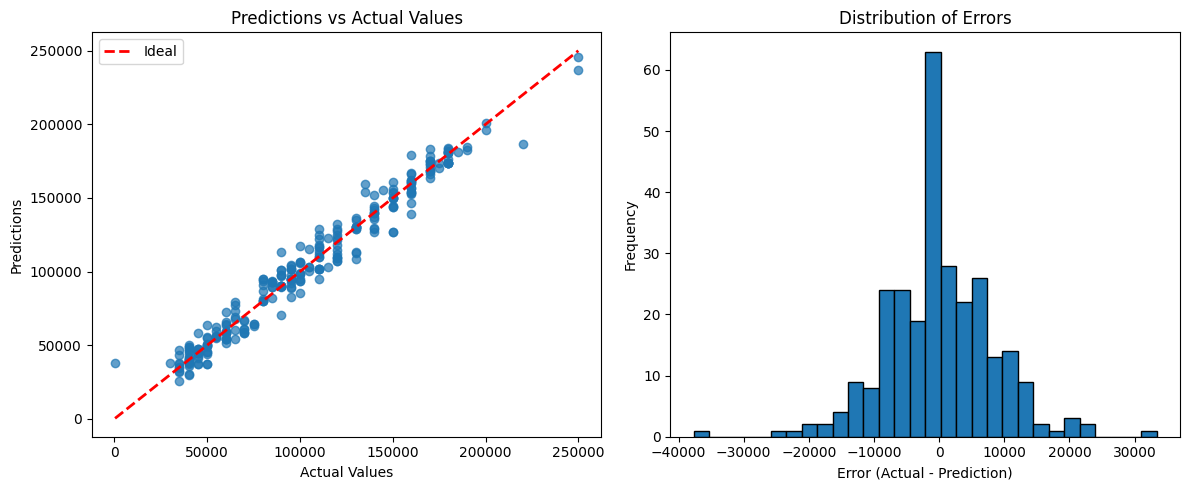

In [38]:
regression_plots(y_train, y_predicted_train)

In [39]:
y_predicted = pipeline.predict(x_test_p)
np.round(y_predicted, decimals=1)

array([ 40535.4,  41825.5,   3168.3, 135566.4,  92742.5, 156438.5,
        58410.7, 128502.3,  36091.9, 186142.6,  56075.8, 112359.5,
       150000. , 104081.7, 162493. ,  53966.2,  49831. ,  40235.9,
       144752.2, 186032.4,  94082.5,  96469.7, 104273.8,  48770.6,
       173640.5,  54056.4,  47333.8,  63884.5, 138142.4,  65911.1,
        62449.7,  98495.9, 123241.2, 131894. ,  40798.1, 115685.9,
        81971.4, 121649.9, 113219.2,  70488.7, 176001.1, 155455.1,
       113800.5, 173740.3, 175088.7,  50007.6,  28286. , 106676.3,
        60647.8,  96595.6,  63814. ,  95000. ,  98947.2, 103274.1,
       105614.4, 168840.3,  95532.9,  36091.9,  44646.8,  43630.9,
        38134. , 125866.1, 144688.7,  48657.3,  37592.1,  78945.2,
        96469.7, 175088.7,  60619.8, 143893.7,  14528.3,  28770.7,
       103786.8,  32478.2, 173740.3,  50272.6,  56075.8,  92742.5,
       165877.1,  67708.2,  50804.4, 116740.6,  42272. ,  48093.2,
        48457.1, 136190.4, 103274.1,  51094.4,  35730.7,  4569

In [40]:
np.array(y_test)

array([ 40000.,  40000.,  50000., 140000.,  85000., 140000.,  60000.,
       115000.,  40000., 190000.,  70000., 130000., 150000., 105000.,
       120000.,  60000.,  45000.,  40000., 150000., 180000.,  90000.,
        95000., 120000.,  40000., 170000.,  40000.,  45000.,  50000.,
       120000.,  65000.,  70000., 100000., 100000., 120000.,  45000.,
       130000.,  75000., 110000.,  90000.,  60000., 120000., 150000.,
       125000., 180000., 170000.,  55000.,  55000., 105000.,  80000.,
        90000., 120000.,  95000., 100000.,  95000.,  80000., 180000.,
        90000.,  40000.,  40000.,  50000.,  45000., 160000., 150000.,
        40000.,  35000.,  95000.,  95000., 170000.,  50000., 150000.,
        65000.,  45000., 110000.,  35000., 180000.,  50000.,  50000.,
        85000., 180000.,  55000.,  55000.,  80000.,  40000.,  40000.,
        35000., 190000.,  95000.,  45000.,  35000.,  50000.,  45000.,
        50000.,  50000., 155000.])

In [61]:
regression_report(y_test, y_predicted)

Min y:         35000.00
Max y:         190000.00
Mean y:        90585.11
Std deviation: 46644.71

Mean Squared Error (MSE):       283460699.972
Mean Absolute Error (MAE):      11110.020
Root Mean Squared Error (RMSE): 16836.291
R^2 Score:                      0.868
Mean Absolute Percentage Error (MAPE): 14.08%


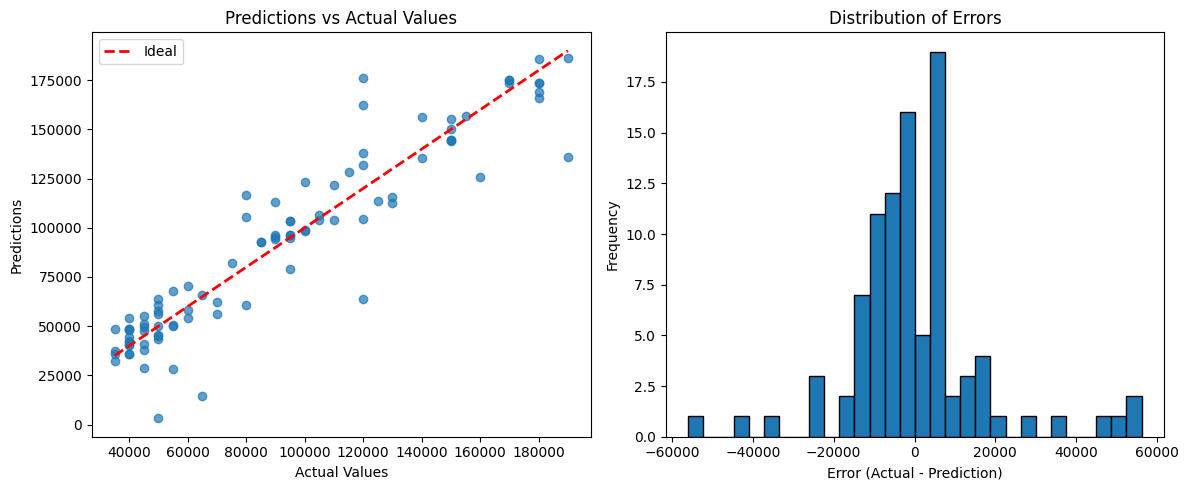

In [62]:
regression_plots(y_test, y_predicted)

In [63]:
model_ridge = Ridge()
model_ridge.fit(x_train_p, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [64]:
train_predicted_ridge = model_ridge.predict(x_train_p)
train_predicted_ridge

array([ 41902.41586753, 175392.70107253,  45018.12099316,  90390.68175168,
       175275.36367731, 130651.25460843, 127597.23448199, 157148.32186965,
       127874.8231249 , 174495.14218547,  63039.78948521,  84784.805292  ,
       100109.87406678, 127597.23448199, 159859.29345296,  93231.03187216,
       136534.1157194 , 104837.08399569, 161626.40314608,  90870.88685079,
       195164.46105803,  97060.68291401,  23046.68705429,  99151.51452776,
        68494.72167832, 150069.92404349, 183141.02007529, 192410.74534765,
        41193.43633236,  97614.26645346, 163815.77987539,  54383.17905721,
       107303.36110171, 164627.6710928 ,  56803.01363621, 145816.57283581,
       101007.43295383, 100091.74916995,  39363.89440174,  91201.00091037,
       166686.83298097, 180144.53962187,  74781.76291615, 180237.24839665,
       174697.45898413,  41076.09893714,  43196.04972623,  78323.31688534,
       109681.63131981, 128872.63445272,  65030.63324448,  47447.80011934,
        50777.81514231, 1

In [65]:
np.array(y_train)

array([ 40000., 170000.,  50000., 100000., 180000., 110000., 110000.,
       150000., 120000., 170000.,  65000.,  95000., 110000., 120000.,
       150000., 100000., 115000., 120000., 140000.,  90000., 185000.,
       110000.,  35000., 100000.,  50000., 150000., 180000., 180000.,
        35000.,  65000., 160000.,  50000., 100000., 170000.,  45000.,
       145000., 100000.,  95000.,  40000.,  90000., 160000., 160000.,
        65000., 180000., 170000.,  40000.,  35000.,  95000., 105000.,
       130000.,  65000.,  50000.,  45000., 140000., 100000.,  75000.,
        40000.,  45000., 180000.,  40000.,  50000., 160000., 110000.,
        50000.,  90000.,  60000.,  85000.,  95000.,  55000.,  40000.,
        40000.,  85000.,  50000.,  35000.,  55000.,  60000., 180000.,
        60000., 100000.,    350.,  45000., 160000., 160000.,  70000.,
       120000., 130000., 160000., 105000., 170000.,  95000., 110000.,
        60000., 130000., 140000.,  35000.,  40000.,  55000., 170000.,
       130000.,  700

In [66]:
regression_report(y_train, train_predicted_ridge)

Min y:         350.00
Max y:         250000.00
Mean y:        103943.91
Std deviation: 48383.60

Mean Squared Error (MSE):       164092285.989
Mean Absolute Error (MAE):      9200.868
Root Mean Squared Error (RMSE): 12809.851
R^2 Score:                      0.930
Mean Absolute Percentage Error (MAPE): 55.16%


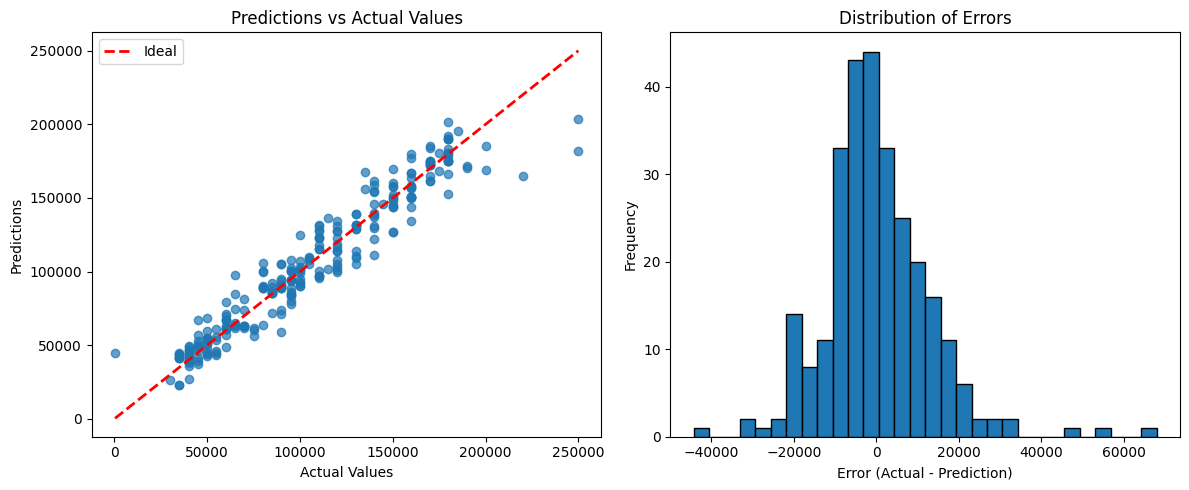

In [67]:
regression_plots(y_train, train_predicted_ridge)

In [68]:
predicted_ridge = model_ridge.predict(x_test_p)
predicted_ridge

array([ 34135.75361822,  49538.63173309,  37809.93953707, 149659.2907205 ,
        85398.09404723, 150062.35939485,  58095.2543066 , 114445.124565  ,
        45591.64329602, 179222.35211438,  57136.89476758, 113685.15650013,
       148096.42982496,  81913.75218641, 134705.04481941,  61201.22059987,
        51708.847911  ,  48921.658319  , 146115.37095778, 174377.80479025,
        90359.97876657,  93606.13027596, 105268.71914274,  46432.66543982,
       184964.45832556,  40278.86364281,  48669.39559059,  68494.72167832,
       103148.09830623,  47411.18150446,  59110.38898612, 107196.11792272,
       120279.7953177 , 134021.70533565,  55739.69986166, 112552.6844254 ,
        57208.11556257,  89029.11521769,  89512.01522091,  86528.21529653,
       141363.53240844, 160611.5068638 , 115314.67537106, 170430.81635319,
       172521.64796694,  39714.61175165,  47509.59674552, 119083.28736371,
        55206.61326304,  82811.31107347,  95404.46341869,  83482.10513201,
        91318.33830559,  

In [69]:
np.array(y_test)

array([ 40000.,  40000.,  50000., 140000.,  85000., 140000.,  60000.,
       115000.,  40000., 190000.,  70000., 130000., 150000., 105000.,
       120000.,  60000.,  45000.,  40000., 150000., 180000.,  90000.,
        95000., 120000.,  40000., 170000.,  40000.,  45000.,  50000.,
       120000.,  65000.,  70000., 100000., 100000., 120000.,  45000.,
       130000.,  75000., 110000.,  90000.,  60000., 120000., 150000.,
       125000., 180000., 170000.,  55000.,  55000., 105000.,  80000.,
        90000., 120000.,  95000., 100000.,  95000.,  80000., 180000.,
        90000.,  40000.,  40000.,  50000.,  45000., 160000., 150000.,
        40000.,  35000.,  95000.,  95000., 170000.,  50000., 150000.,
        65000.,  45000., 110000.,  35000., 180000.,  50000.,  50000.,
        85000., 180000.,  55000.,  55000.,  80000.,  40000.,  40000.,
        35000., 190000.,  95000.,  45000.,  35000.,  50000.,  45000.,
        50000.,  50000., 155000.])

In [70]:
regression_report(y_test, predicted_ridge)

Min y:         35000.00
Max y:         190000.00
Mean y:        90585.11
Std deviation: 46644.71

Mean Squared Error (MSE):       145376199.464
Mean Absolute Error (MAE):      9611.065
Root Mean Squared Error (RMSE): 12057.205
R^2 Score:                      0.932
Mean Absolute Percentage Error (MAPE): 12.75%


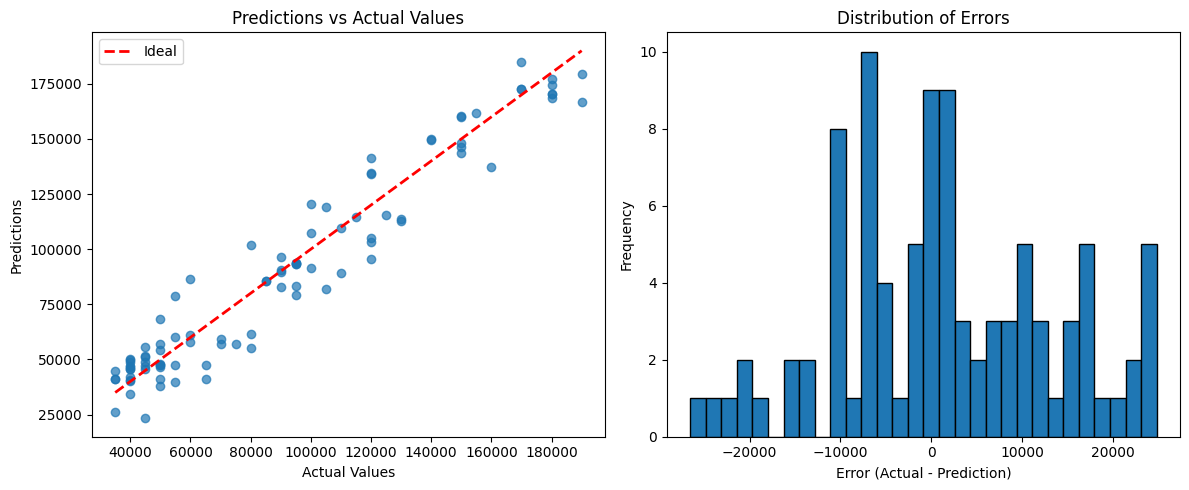

In [71]:
regression_plots(y_test, predicted_ridge)